In [5]:
import numpy as np
import time as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

In [6]:
def conver_time(timestr):
    timestr = timestr.decode("utf-8") 
    ts,ms = timestr.split('.')
    timest = dt.strptime(ts, '%Y-%m-%d %H:%M:%S')
    return int(1000*dt.mktime(timest) + int(ms))#+10800)+int(ms))

In [7]:
def feature_scaling(x):
    x_loc = x #.reshape(x.size,1)
    return np.asarray((x_loc-np.mean(x_loc))/np.std(x_loc), dtype=float)

In [158]:
data = np.loadtxt('data-train.csv', delimiter=',', skiprows=1, converters={1:conver_time})
#x = np.array((data[['ID', 'Timestamp', 'Location']]))
x = data[:,:data.shape[1]-1].copy()
n = x.shape[1]
#x[:,1] = vconv_time(x[:,1])
x[:,0] = feature_scaling(x[:,0])
x[:,1] = feature_scaling(x[:,1])
x[:,2] = feature_scaling(x[:,2])
y = np.array(data[:,data.shape[1]-1], int)
m = y.size
x = np.append(np.ones((m,1), float),x,axis=1)
y = y.reshape(m,1)
theta_init = np.zeros((n+1,1))

In [161]:
# One hot encoding attempt for late submission
data_onehot = pd.read_csv('data-train.csv', sep=',', parse_dates=[1])
#data_onehot = data_onehot.append({'ID': 343665,
#                   'Timestamp': '2016-03-30 12:18:52.537',
#                   'Location': 9,
#                   'Category': 1},
#                  ignore_index=True)
#data_onehot = data_onehot.append({'ID': 343666,
#                   'Timestamp': '2016-03-30 12:18:52.537',
#                   'Location': 11,
#                   'Category': 1},
#                  ignore_index=True)
#y_imputated = y.copy()
#y_imputated = np.append(y_imputated, np.ones((2,1)), axis=0)
new_df = pd.DataFrame({'Year' : data_onehot.Timestamp.dt.year,
                       'Month' : data_onehot.Timestamp.dt.month,
                       'Day' : data_onehot.Timestamp.dt.day,
                       'Hour' : data_onehot.Timestamp.dt.hour,
                        'DoW' : data_onehot.Timestamp.dt.dayofweek,
#                       'Minute' : data_onehot.Timestamp.dt.minute,
#                       'Second' : data_onehot.Timestamp.dt.second,
    'Location':data_onehot['Location']})

new_df = new_df[['Year', 'Month', 'Day', 'Hour', 'DoW', 'Location']]
encoder = preprocessing.OneHotEncoder()
ttest = encoder.fit_transform(new_df)
x_onehot = ttest.toarray()
x_onehot = np.insert(x_onehot, 0, 1, axis=1)
theta_init_onehot = np.zeros((80,1))

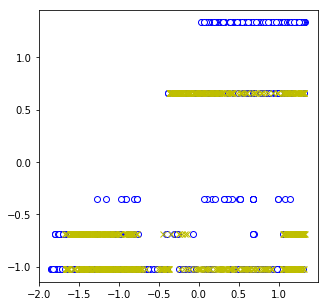

In [147]:
fig = plt.figure(figsize=[5,5])
sample_size = 800
plt.plot(x[np.where(y[:,0]==0)[0],2][:sample_size], x[np.where(y[:,0]==0)[0],3][:sample_size], 'wo', markeredgecolor='b')
plt.plot(x[np.where(y[:,0]==1)[0],2][:sample_size], x[np.where(y[:,0]==1)[0],3][:sample_size], 'yx')
plt.show()

In [56]:
def sigmoid_function(x, theta):
    theta_loc = theta.reshape(theta.size,1)
    return (1+np.e**-(x.dot(theta_loc)))**-1

def cost_function(x,y,theta,lmbd):
    m = y.size
    n = theta.size
    y_loc = y.reshape(m,1)
    return (lmbd/2*(theta[1:].T.dot(theta[1:])).sum() - (y_loc*np.log(sigmoid_function(x, theta))).sum() - ((1-y_loc)*np.log(1e-10 + 1 - sigmoid_function(x, theta))).sum())/m

def grad_function(x,y,theta,lmbd):
    m = y.size
    n = theta.size
    y_loc = y.reshape(m,1)
    grad = (x.T.dot(sigmoid_function(x,theta) - y) + lmbd*np.append(0,theta[1:].flatten()).reshape(n,1))/m
    return grad

In [57]:
print('Cost @ initital theta = {}'.format(cost_function(x,y,theta_init,0)))
print('Grad @ initital theta = {}'.format(grad_function(x,y,theta_init,0)))

Cost @ initital theta = 0.6931471804388162
Grad @ initital theta = [[ 0.10564555]
 [ 0.09699671]
 [ 0.11027492]
 [ 0.19488575]]


In [58]:
def grad_descent(cost_func, grad_func, x, y, theta_init, alpha, lmbd, epsilon, max_iters=1500):
    n = theta_init.size
    theta = theta_init.reshape(n,1)
    p_cost = cost_func(x,y,theta,lmbd) + epsilon
    for i in range(max_iters):
        c_cost = cost_function(x,y,theta,lmbd)
        if c_cost > p_cost - epsilon:
            print('Convergence @ theta = {}'.format(theta))
            print('Cost function value = {}'.format(c_cost))
            return theta
        grad = grad_function(x,y,theta,lmbd)
        theta = theta - alpha*grad
        
    print('Failed to converge')
    print('Current theta = {}'.format(theta))
    print('Cost function value = {}'.format(c_cost))
    return theta    

In [72]:
theta_rslt = grad_descent(cost_function, grad_function, x_onehot, y, theta_init_onehot, 1, 10, 1e-20, max_iters=1500)

Failed to converge
Current theta = [[ -1.09236966e+00]
 [ -1.00732707e+00]
 [ -4.74603298e-02]
 [ -5.73858423e-01]
 [  3.05726062e-02]
 [ -2.63716248e-01]
 [  2.19876896e-01]
 [  3.70971875e-02]
 [ -1.74680643e+00]
 [ -2.57448245e+00]
 [ -4.66144814e-01]
 [  1.32231273e+00]
 [  1.25491664e+00]
 [  9.65707513e-01]
 [  7.39737388e-01]
 [ -3.77767064e-01]
 [ -2.35701520e-01]
 [ -2.59464752e-01]
 [ -2.23830625e-01]
 [ -2.58291829e-01]
 [ -9.90550060e-02]
 [ -1.01454375e-01]
 [ -1.34010911e-01]
 [ -2.77151515e-01]
 [ -1.83639392e-01]
 [ -2.38296260e-01]
 [ -2.10593641e-01]
 [ -1.81739817e-01]
 [ -1.94083049e-01]
 [ -2.28039258e-03]
 [ -4.00516452e-02]
 [  1.09494710e-01]
 [  1.05424135e-01]
 [  4.28645539e-02]
 [  5.32412066e-02]
 [  4.78495847e-02]
 [  3.82818065e-01]
 [  2.55544946e-01]
 [  4.81088365e-02]
 [ -5.48136248e-02]
 [ -6.87090161e-03]
 [  1.87895121e-01]
 [  1.08454952e-01]
 [  2.76609524e-01]
 [  1.27737874e-01]
 [  2.78265412e-01]
 [  1.69422205e-01]
 [  2.04437247e-01]
 [  1

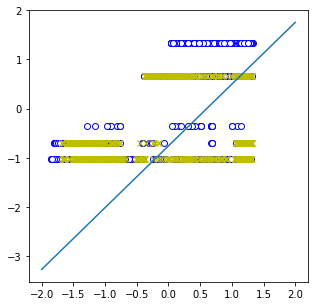

In [153]:
fig = plt.figure(figsize=[5,5])
sample_size = 800
plt.plot(x[np.where(y[:,0]==0)[0],2][:sample_size], x[np.where(y[:,0]==0)[0],3][:sample_size], 'wo', markeredgecolor='b')
plt.plot(x[np.where(y[:,0]==1)[0],2][:sample_size], x[np.where(y[:,0]==1)[0],3][:sample_size], 'yx')
plt.plot(np.linspace(-2,2,100), (np.linspace(-2,2,100)*-.8834--.534)/-.7028)
plt.show()

In [59]:
def predict(x,theta):
#    theta_loc = theta.reshape(theta.size,1)
    return np.array(sigmoid_function(x,theta) > .5, int)

In [62]:
data_test = np.loadtxt('data-test.csv', delimiter=',', skiprows=1, converters={2:conver_time})
x_test = data_test.copy()
m_test = x_test.shape[0]
x_test[:,0] = feature_scaling(x_test[:,0])
x_test[:,1] = feature_scaling(x_test[:,1])
x_test[:,2] = feature_scaling(x_test[:,2])
x_test = np.append(np.ones((m_test,1), float),x_test,axis=1)

In [61]:
theta_test = theta_rslt.copy()
bfr = theta_test[2].copy()
theta_test[2] = theta_test[3].copy()
theta_test[3] = bfr.copy()
#y_test = np.array(data_test[:,data_test.shape[1]-1], int)
#y_test = y_test.reshape(m_test,1)

NameError: name 'theta_rslt' is not defined

In [ ]:
prd = predict(x_test, theta_test)
submit_sample = np.asarray(np.append(data_test[:,0].reshape(m_test,1), prd, axis=1), dtype=int)
np.savetxt('submission.csv', submit_sample, delimiter=',', fmt='%d', header='ID,Category', comments='')

In [166]:
# For late submission
theta_onehot = grad_descent(cost_function, grad_function, x_onehot, y, theta_init_onehot, 1, 10, 1e-20)

Failed to converge
Current theta = [[ -1.06308623e+00]
 [ -9.89999887e-01]
 [ -3.68606374e-02]
 [ -5.67007605e-01]
 [  4.97212874e-02]
 [ -2.46288009e-01]
 [  2.52691618e-01]
 [  7.61899863e-02]
 [ -1.70334512e+00]
 [ -2.71339079e+00]
 [ -4.88602458e-01]
 [  1.34369668e+00]
 [  1.23107140e+00]
 [  9.66170853e-01]
 [  7.72231641e-01]
 [ -4.01132568e-01]
 [ -2.50904075e-01]
 [ -2.85933915e-01]
 [ -2.00710222e-01]
 [ -2.46998861e-01]
 [ -1.17459941e-01]
 [ -1.10737506e-01]
 [ -1.59164555e-01]
 [ -2.55279954e-01]
 [ -1.82400588e-01]
 [ -2.10251692e-01]
 [ -1.96349620e-01]
 [ -1.74813632e-01]
 [ -2.35671266e-01]
 [ -7.69771160e-03]
 [ -2.92755369e-02]
 [  1.15536662e-01]
 [  1.24013674e-01]
 [  7.40545717e-02]
 [  7.70442825e-02]
 [  5.44996568e-02]
 [  4.09451951e-01]
 [  2.31862559e-01]
 [  8.16567867e-02]
 [ -2.82503558e-02]
 [ -7.68732821e-03]
 [  1.89433594e-01]
 [  6.05930931e-02]
 [  2.79176008e-01]
 [  1.08741460e-01]
 [  2.67794505e-01]
 [  3.86057173e-03]
 [  3.84532522e-03]
 [ -6

In [162]:
# Late submission test set
data_onehot_test = pd.read_csv('data-test.csv', sep=',', parse_dates=[2])
new_df_test = pd.DataFrame({'Year' : data_onehot_test.Timestamp.dt.year,
                       'Month' : data_onehot_test.Timestamp.dt.month,
                       'Day' : data_onehot_test.Timestamp.dt.day,
                       'Hour' : data_onehot_test.Timestamp.dt.hour,
                        'DoW' : data_onehot_test.Timestamp.dt.dayofweek,
#                       'Minute' : data_onehot_test.Timestamp.dt.minute,
#                       'Second' : data_onehot_test.Timestamp.dt.second,
    'Location':data_onehot_test['Location']})

new_df_test = new_df_test[['Year', 'Month', 'Day', 'Hour', 'DoW', 'Location']]
ttest_test = encoder.fit_transform(new_df_test)
x_onehot_test = ttest_test.toarray()
x_onehot_test = np.insert(x_onehot_test, 0, 1, axis=1)

In [165]:
x_onehot.shape

(332191, 80)

In [167]:
# Two new locations appeared in test set - adding empty weights for them
#theta_onehot_test = np.append(theta_onehot,np.zeros((1,1)),axis=0)
#theta_onehot_test = np.append(theta_onehot_test,np.zeros((1,1)),axis=0)

test_prd = predict(x_onehot_test,theta_onehot)

In [169]:
data_test.shape

(332189, 3)

In [170]:
#Filling prediction rows with new locations (not encountered in training set) with random values
#test_prd[np.where((data_onehot_test.Location==9) | (data_onehot_test.Location==11))] = np.random.randint(2,size=10124).reshape(10124,1)

submit_sample = np.asarray(np.append(data_test[:,0].reshape(m_test,1), test_prd, axis=1), dtype=int)
np.savetxt('submission.csv', submit_sample, delimiter=',', fmt='%d', header='ID,Category', comments='')